# Notebook para Exploratory Data Analysis dos dados da plataforma Sucupira

In [21]:
import pandas as pd
import numpy as np
import pymysql as pms
import matplotlib.pyplot as plt

In [89]:
tab = pd.read_csv('sucupirafilter.csv',sep=';')

In [166]:
tab.head()

,(area_avaliacao) id,(area_avaliacao) nome,(area_avaliacao) codigo,(area_conhecimento) id,(area_conhecimento) nome,(area_conhecimento) codigo,(area_conhecimento) area_avaliacao_id,(programa) id,(programa) nome,(programa) codigo,...,(instituicao) url,(instituicao) coordenadas,(curso) id,(curso) nome,(curso) situacao,(curso) nivel,(curso) nota_curso,(curso) data_reconhecimento,(curso) data_inicio,(curso) programa_id
0,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,87,ADMINISTRAÇÃO PÚBLICA EM REDE NACIONAL,53045009001P3,...,http://portal.ufgd.edu.br/,-22.19446 -54.93025,125,ADMINISTRAÇÃO PÚBLICA EM REDE NACIONAL,EM FUNCIONAMENTO,Mestrado Profissional,3,23/04/2013,01/07/2014,87
1,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,88,ADMINISTRAÇÃO,32020015008P9,...,http://www.ppga.cefetmg.br,-19.9316 -43.98497,126,ADMINISTRAÇÃO,EM FUNCIONAMENTO,Mestrado,3,12/12/2014,03/08/2015,88
2,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,89,Administração,52016013002P3,...,http://www.unialfa.com.br/mestrado/adm,-16.64133 -49.30773,127,Administração,EM FUNCIONAMENTO,Mestrado Profissional,3,23/04/2012,01/08/2012,89
3,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,90,ADMINISTRAÇÃO DAS MICRO E PEQUENAS EMPRESAS,33149011003P8,...,http://www.faccamp.br/new/doutorado/administracao,-15.78791 -47.8782,128,ADMINISTRAÇÃO DAS MICRO E PEQUENAS EMPRESAS,EM FUNCIONAMENTO,Doutorado,4,26/10/2016,17/02/2017,90
4,149,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",27,2,ADMINISTRAÇÃO,60200006,149,91,ADMINISTRAÇÃO DAS MICRO E PEQUENAS EMPRESAS,33149011001P5,...,http://www.faccamp.br/new/doutorado/administracao,-15.78791 -47.8782,129,ADMINISTRAÇÃO DAS MICRO E PEQUENAS EMPRESAS,EM FUNCIONAMENTO,Mestrado Profissional,4,16/09/2008,01/01/2009,91


In [167]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 34 columns):
(area_avaliacao) id                      352 non-null int64
(area_avaliacao) nome                    352 non-null object
(area_avaliacao) codigo                  352 non-null int64
(area_conhecimento) id                   352 non-null int64
(area_conhecimento) nome                 352 non-null object
(area_conhecimento) codigo               352 non-null int64
(area_conhecimento) area_avaliacao_id    352 non-null int64
(programa) id                            352 non-null int64
(programa) nome                          352 non-null object
(programa) codigo                        352 non-null object
(programa) uf                            352 non-null object
(programa) area_conhecimento_id          352 non-null int64
(programa) instituicao_id                352 non-null int64
(instituicao) id                         352 non-null int64
(instituicao) nome                       352 non-n

In [164]:
tab['(curso) nota_curso'].value_counts()

4    121
3    115
5     74
A     17
6     14
7     10
2      1
Name: (curso) nota_curso, dtype: int64

Inconsistência no dataset temos um 17 valores de 'A'

__(Tarefa 1) - Resolver como tratar estes A's__ 

In [91]:
tab.describe()

,(area_avaliacao) id,(area_avaliacao) codigo,(area_conhecimento) id,(area_conhecimento) codigo,(area_conhecimento) area_avaliacao_id,(programa) id,(programa) area_conhecimento_id,(programa) instituicao_id,(instituicao) id,(instituicao) codigo,(curso) id,(curso) programa_id
count,352.00000,352.000000,352.000000,3.520000e+02,352.00000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,153.93750,26.838068,11.332386,5.779063e+07,153.93750,217.968750,11.332386,163.207386,163.207386,337079.846591,300.500000,217.968750
std,10.66301,8.770218,19.676595,1.458009e+07,10.66301,74.959755,19.676595,63.508212,63.508212,18264.008890,101.757883,74.959755
min,149.00000,1.000000,2.000000,1.010001e+07,149.00000,87.000000,2.000000,72.000000,72.000000,2981.000000,125.000000,87.000000
25%,149.00000,27.000000,2.000000,6.020001e+07,149.00000,154.000000,2.000000,116.000000,116.000000,338440.000000,212.750000,154.000000
50%,149.00000,27.000000,2.000000,6.020001e+07,149.00000,216.500000,2.000000,149.500000,149.500000,338689.000000,300.500000,216.500000
75%,153.00000,27.000000,9.000000,6.020001e+07,153.00000,282.000000,9.000000,196.000000,196.000000,339030.000000,388.250000,282.000000
max,197.00000,50.000000,84.000000,9.050001e+07,197.00000,353.000000,84.000000,331.000000,331.000000,341393.000000,476.000000,353.000000


Todos os dados númericos acima se tratam de identificadores, no caso '.describe()' não faria sentido.

__Parecem existir alguns valores '-' nas colunas de datas, constituindo assim missing values__

In [154]:
datas =tab[tab.columns[tab.columns.str.contains('data')]].replace('-',np.nan).dropna()
for col in datas :
    datas[col] = pd.to_datetime(datas[cols])
    
datas.dtypes

(curso) data_reconhecimento    datetime64[ns]
(curso) data_inicio            datetime64[ns]
dtype: object

C:\Users\Bronze\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C00542B278>,
      dtype=object)

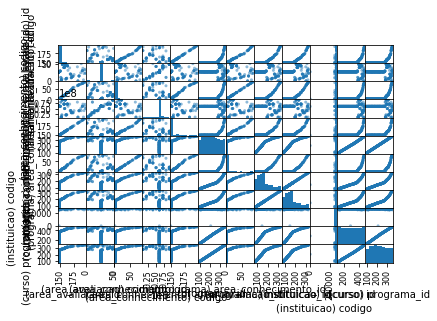

In [173]:
pd.scatter_matrix(tab) # não é informaticos considerando que os valores de id estão numericos

# Realizar inner join com o primeiro data frame?
